In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

project_dir = Path().resolve().parents[1]
data_dir = project_dir / "lib" / "optimal_age_cuts"

data = pd.read_csv(data_dir / ("optimal_age_cuts_results_overall.csv"))


In [3]:
site = "AOMIC_ID1000"
age_bins = 3

df = data[data["site"] == site].copy()
df = df[df["age_bins"] == age_bins]
df

,site,low_age_cut,high_age_cut,Obtained_N,age_diff,age_bins
0,AOMIC_ID1000,19.0,21.0,104,2.0,3
1,AOMIC_ID1000,19.0,22.0,208,3.0,3
2,AOMIC_ID1000,19.0,23.0,312,4.0,3
3,AOMIC_ID1000,19.0,24.0,468,5.0,3
4,AOMIC_ID1000,19.0,25.0,468,6.0,3
5,AOMIC_ID1000,19.0,26.0,702,7.0,3
6,AOMIC_ID1000,20.0,22.0,232,2.0,3
7,AOMIC_ID1000,20.0,23.0,464,3.0,3
8,AOMIC_ID1000,20.0,24.0,696,4.0,3
9,AOMIC_ID1000,20.0,25.0,836,5.0,3


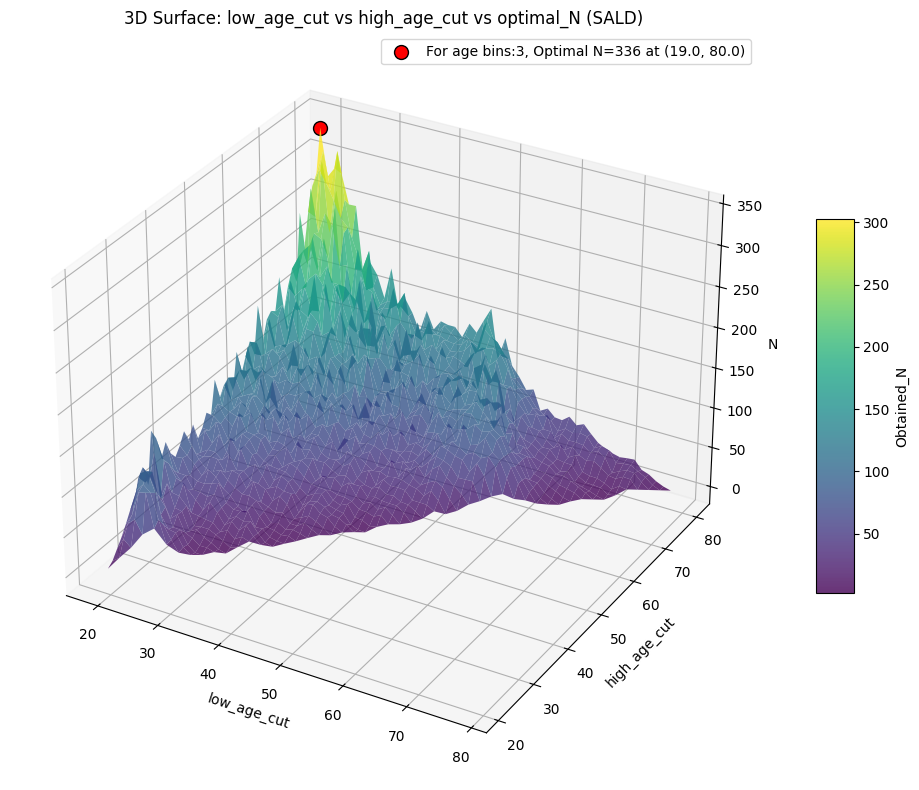

In [6]:

site = "SALD"
age_bins = 3

df = data[data["site"] == site].copy()
df = df[df["age_bins"] == age_bins]

# Prepare grid for surface
x = df["low_age_cut"].values
y = df["high_age_cut"].values
z = df["Obtained_N"].values

# Create grid
xi = np.linspace(x.min(), x.max(), 50)
yi = np.linspace(y.min(), y.max(), 50)
xi, yi = np.meshgrid(xi, yi)

# Interpolate z values on grid
zi = griddata((x, y), z, (xi, yi), method="linear")


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

# Plot surface
surf = ax.plot_surface(xi, yi, zi, cmap="viridis", alpha=0.8, edgecolor="none")

ax.set_xlabel("low_age_cut")
ax.set_ylabel("high_age_cut")
ax.set_zlabel("N")
ax.set_title(f"3D Surface: low_age_cut vs high_age_cut vs optimal_N ({site})")
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label="Obtained_N")
plt.tight_layout()
# Highlight the optimal (max) N with a red circle on the 3D surface plot

# Find the row with the maximum optimal_N
a = df[df["Obtained_N"] == df["Obtained_N"].max()]
max_row = a.loc[a["age_diff"].idxmax()]

# Plot the red circle at the optimal point
ax.scatter(
    max_row["low_age_cut"],
    max_row["high_age_cut"],
    max_row["Obtained_N"],
    color="red",
    s=100,
    edgecolor="black",
    marker="o",
    label=f"For age bins:{age_bins}, Optimal N={max_row['Obtained_N']} at ({max_row['low_age_cut']}, {max_row['high_age_cut']})",
)

ax.legend()
plt.show()

# %%
